In [1]:
######### Importing all the required packages ###################

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns


import dataset 

/home/madhav/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
####################### Data Import ####################
data = pd.read_csv("/home/madhav/Desktop/MADHAV/Telcom_Data.csv")
data=pd.DataFrame(data)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
data.shape

(3333, 21)

In [5]:
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
############################### OUTLIER REMOVAL #######################################################

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c430ad438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c430adcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c430ad2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c430bf588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c430bf9b0>],
 'means': []}

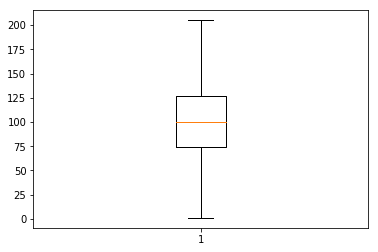

In [7]:
acclen_in = data[data['account length'] <208]
plt.boxplot(acclen_in['account length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42fc4198>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42fc4a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42fc4048>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42fce2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42fce710>],
 'means': []}

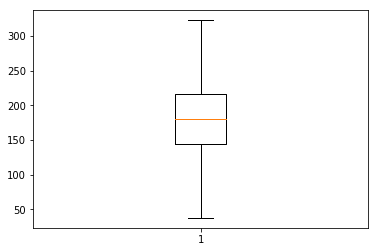

In [8]:
daymin_in = acclen_in[(acclen_in['total day minutes'] <324) & (acclen_in['total day minutes']>36) ]
plt.boxplot(daymin_in['total day minutes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42f9ec88>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42fa7588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42f9eb38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42fa7dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42fb1240>],
 'means': []}

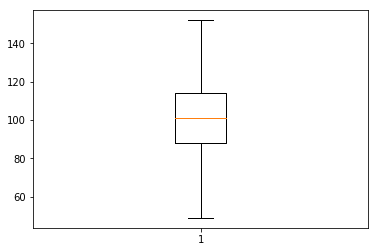

In [9]:
daycall_in = daymin_in[(daymin_in['total day calls'] <156) & (daymin_in['total day calls']>48) ]
plt.boxplot(daycall_in['total day calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42f7f240>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42f7fb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42f7f0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42f08390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42f087b8>],
 'means': []}

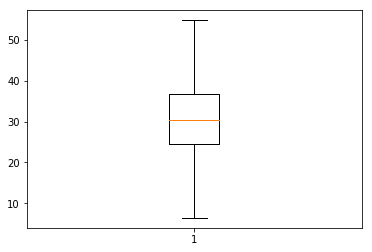

In [10]:
daychar_in = daycall_in[(daycall_in['total day charge'] <200) & (daycall_in['total day charge']>0)]
plt.boxplot(daychar_in['total day charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42ed8470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42ed8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42ed8320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42ee15c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42ee19e8>],
 'means': []}

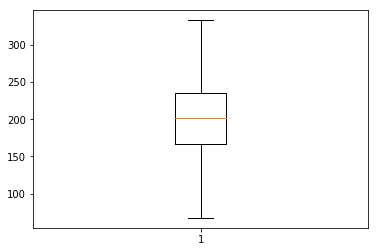

In [11]:
evemin_in = daychar_in[(daychar_in['total eve minutes'] <335) & (daychar_in['total eve minutes']>67) ]
plt.boxplot(evemin_in['total eve minutes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42eb2550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42eb2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42eb2400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42eb96a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42eb9ac8>],
 'means': []}

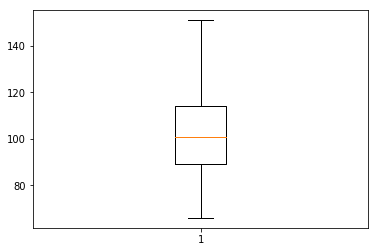

In [12]:
evecall_in = evemin_in[(evemin_in['total eve calls'] <152) & (evemin_in['total eve calls']>65) ]
plt.boxplot(evecall_in['total eve calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42e08128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42e089e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42e7bf98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42e0f278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42e0f6a0>],
 'means': []}

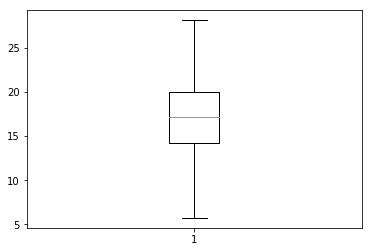

In [13]:
evechr_in = evecall_in[(evecall_in['total eve charge'] <30.91) & (evecall_in['total eve charge']>0) ]
plt.boxplot(evechr_in['total eve charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42ddf0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42ddf9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42dd6f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42de9240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42de9668>],
 'means': []}

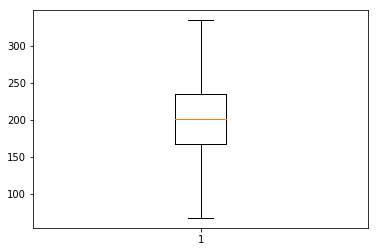

In [14]:
nitmin_in = evechr_in[(evechr_in['total night minutes']<342) & (evechr_in['total night minutes']>66)]
plt.boxplot(nitmin_in['total night minutes'])

/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42dbc208>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42dbcac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42dbc0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42d44358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42d44780>],
 'means': []}

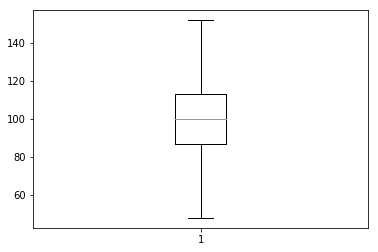

In [15]:
nitcal_in = nitmin_in[(nitmin_in['total night calls']< 153) & (data['total night calls']>46)]
plt.boxplot(nitcal_in['total night calls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42d122b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42d12b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42d12160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42d1c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42d1c828>],
 'means': []}

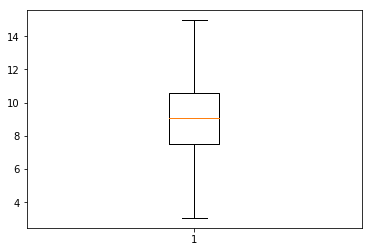

In [16]:
nitcha_in = nitcal_in[(nitcal_in['total night charge']< 15) & (nitcal_in['total night charge']>3)]
plt.boxplot(nitcha_in['total night charge'])

/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42ceb630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42cebef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42ceb4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42cf4780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42cf4ba8>],
 'means': []}

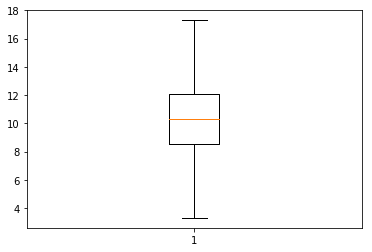

In [17]:
intlmin_in = nitcha_in[(nitcha_in['total intl minutes']< 17.5) & (data['total intl minutes']>3.1)]
plt.boxplot(intlmin_in['total intl minutes'])

/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42c4e080>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42c4e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42c43ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42c561d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42c565f8>],
 'means': []}

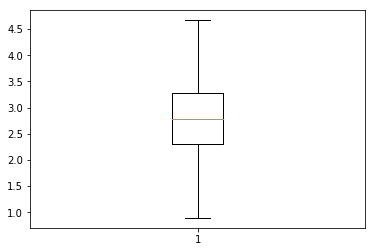

In [18]:
intlchrg_in = intlmin_in[(intlmin_in['total intl charge']< 200) & (data['total intl charge']>0)]
plt.boxplot(intlchrg_in['total intl charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c42c24f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c42c2d898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c42c24e48>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c42c38128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c42c38550>],
 'means': []}

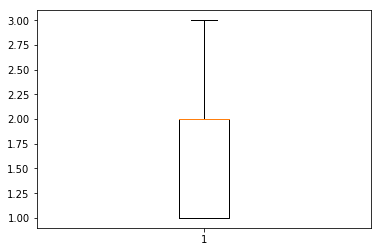

In [19]:
cuscall_in = intlchrg_in[(intlchrg_in['customer service calls'] < 4.0) & (intlchrg_in['customer service calls']>0)]
plt.boxplot(cuscall_in['customer service calls'])

In [20]:
######### Data Import ####################
#data = pd.read_csv("/home/madhav/Desktop/MADHAV/finaldata.csv")
data=cuscall_in

In [21]:
######## View of data #########

data.shape  ## Number of rows and columns 

(2109, 21)

In [22]:
len(data.columns) ## Number of variables

21

In [23]:
data.head(5)      ## Top 5 rows of the data 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False


In [24]:
## Exploratory Analysis
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.00000
mean,100.680417,437.196776,8.146989,179.986297,100.678521,30.598179,200.702750,101.550972,17.059915,200.375771,100.320057,9.016932,10.261830,4.546230,2.771219,1.68753
std,39.447396,42.446424,13.700518,52.166353,19.226504,8.868195,48.595106,17.396860,4.130660,48.278056,18.889835,2.172660,2.570126,2.485512,0.693919,0.75922
min,1.000000,408.000000,0.000000,37.700000,49.000000,6.410000,69.200000,66.000000,5.880000,67.700000,48.000000,3.050000,3.300000,1.000000,0.890000,1.00000
25%,73.000000,408.000000,0.000000,144.100000,88.000000,24.500000,167.200000,88.000000,14.210000,167.300000,87.000000,7.530000,8.500000,3.000000,2.300000,1.00000
50%,101.000000,415.000000,0.000000,179.900000,101.000000,30.580000,201.400000,101.000000,17.120000,199.500000,101.000000,8.980000,10.300000,4.000000,2.780000,2.00000
75%,127.000000,510.000000,20.000000,215.600000,114.000000,36.650000,233.800000,114.000000,19.870000,233.700000,113.000000,10.520000,12.000000,6.000000,3.240000,2.00000
max,205.000000,510.000000,51.000000,322.500000,152.000000,54.830000,330.600000,151.000000,28.100000,329.200000,152.000000,14.810000,17.300000,20.000000,4.670000,3.00000


In [25]:
## Checking the NA
data.dropna()
data.shape # Hence , there is no NA values.

(2109, 21)

In [26]:
data['state'].unique() 

array(['KS', 'OH', 'OK', 'IA', 'MT', 'ID', 'VT', 'TX', 'SC', 'NE', 'HI',
       'NH', 'AZ', 'GA', 'MA', 'AK', 'NJ', 'AR', 'WI', 'OR', 'MI', 'DE',
       'IN', 'VA', 'UT', 'CO', 'CA', 'MN', 'NC', 'WA', 'NM', 'NV', 'MD',
       'WV', 'KY', 'DC', 'ME', 'MS', 'MO', 'AL', 'FL', 'LA', 'RI', 'NY',
       'WY', 'PA', 'TN', 'SD', 'IL', 'ND', 'CT'], dtype=object)

In [27]:
data['area code'].unique() 

array([415, 408, 510])

In [28]:
data['international plan'].unique() 

array(['no', 'yes'], dtype=object)

In [29]:
data['voice mail plan'].unique() 

array(['yes', 'no'], dtype=object)

In [30]:
data['number vmail messages'].unique() 

array([25, 26,  0, 27, 37, 33, 28, 30, 34, 41, 24, 35, 29, 21, 32, 36, 43,
       31, 38, 23, 22, 40, 48, 18, 39, 45, 16, 20, 17, 14, 42, 19, 51, 15,
       11, 47, 44, 12,  4, 13,  8, 50,  9])

In [31]:
data['total day calls'].unique() 

array([110, 123, 113,  96,  88, 139, 114,  90, 103,  76,  73, 117, 105,
       118,  80,  64, 106,  94, 102,  82,  77,  67,  97, 120, 133, 108,
        57, 112, 129,  83,  91,  98,  74,  70,  93, 146,  72,  99, 104,
       101, 125,  61, 100,  71, 131,  92, 124, 119,  52, 115, 109, 107,
        86,  87, 121, 116, 151, 126, 111,  68, 145,  95,  85,  78, 140,
       122,  79,  55,  89, 135,  66,  81, 134,  63,  53,  84,  65, 141,
       128, 132,  69, 137,  75, 138, 144, 143, 130, 150,  54, 127, 147,
        56,  58,  51, 148,  60, 136, 152,  59,  49, 142,  62])

In [32]:
data['total intl calls'].unique()

array([ 3,  2,  5,  4,  6,  1,  9,  8,  7, 10, 11, 12, 13, 18, 15, 14, 20,
       17])

In [33]:
data['customer service calls'].unique()

array([1, 3, 2])

In [34]:
# Making Dummy Variables for boolean variables 

data['international plan'] = np.where(data['international plan']=='Yes', 1,0)
data['voice mail plan'] = np.where(data['voice mail plan']=='Yes', 1,0)
data['churn'] = np.where(data['churn']==True, 1,0)

/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/madhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [35]:
# Making dummy variable for categorical variables

data = pd.get_dummies(data,columns=['area code','customer service calls'])

In [36]:
data.columns

Index(['state', 'account length', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'churn', 'area code_408',
       'area code_415', 'area code_510', 'customer service calls_1',
       'customer service calls_2', 'customer service calls_3'],
      dtype='object')

In [37]:
## These variables are subjective in nature
data= data.drop(['state','phone number'], axis=1)

In [38]:
######################   STANDARDISATION OF VARIABLES ################################################
## Making the column name in upper case
data.columns=map(str.upper,data.columns)

In [39]:
## Subset variables that needs to be standardised
final_data=data[['ACCOUNT LENGTH','NUMBER VMAIL MESSAGES','TOTAL DAY MINUTES', 'TOTAL DAY CALLS',
        'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
        'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS',
        'TOTAL INTL MINUTES', 'TOTAL INTL CALLS']]

In [40]:
from sklearn import preprocessing
clustervar = final_data.copy()
clustervar['ACCOUNT LENGTH']=preprocessing.scale(clustervar['ACCOUNT LENGTH'].astype('float64'))
clustervar['NUMBER VMAIL MESSAGES']=preprocessing.scale(clustervar['NUMBER VMAIL MESSAGES'].astype('float64'))
clustervar['TOTAL DAY MINUTES']=preprocessing.scale(clustervar['TOTAL DAY MINUTES'].astype('float64'))
clustervar['TOTAL DAY CALLS']=preprocessing.scale(clustervar['TOTAL DAY CALLS'].astype('float64'))
#clustervar['TOTAL DAY CHARGE']=preprocessing.scale(clustervar['TOTAL DAY CHARGE'].astype('float64'))
clustervar['TOTAL EVE MINUTES']=preprocessing.scale(clustervar['TOTAL EVE MINUTES'].astype('float64'))
clustervar['TOTAL EVE CALLS']=preprocessing.scale(clustervar['TOTAL EVE CALLS'].astype('float64'))
#clustervar['TOTAL EVE CHARGE']=preprocessing.scale(clustervar['TOTAL EVE CHARGE'].astype('float64'))
clustervar['TOTAL NIGHT MINUTES']=preprocessing.scale(clustervar['TOTAL NIGHT MINUTES'].astype('float64'))
clustervar['TOTAL NIGHT CALLS']=preprocessing.scale(clustervar['TOTAL NIGHT CALLS'].astype('float64'))
#clustervar['TOTAL NIGHT CHARGE']=preprocessing.scale(clustervar['TOTAL NIGHT CHARGE'].astype('float64'))
clustervar['TOTAL INTL MINUTES']=preprocessing.scale(clustervar['TOTAL INTL MINUTES'].astype('float64'))
clustervar['TOTAL INTL CALLS']=preprocessing.scale(clustervar['TOTAL INTL CALLS'].astype('float64'))
#clustervar['TOTAL INTL CHARGE']=preprocessing.scale(clustervar['TOTAL INTL CHARGE'].astype('float64'))

In [41]:
strdata = pd.DataFrame(clustervar)

In [42]:
#Concatenatinating the dataset 
final_data = pd.concat([strdata,data['INTERNATIONAL PLAN'],data['VOICE MAIL PLAN'],
       data['CHURN'], data['AREA CODE_408'], data['AREA CODE_415'],
       data['AREA CODE_510'], data['CUSTOMER SERVICE CALLS_1'], data['CUSTOMER SERVICE CALLS_2'],
       data['CUSTOMER SERVICE CALLS_3']], axis=1)

In [43]:
 # Deciding Independent and Dependent variables

X = final_data.drop('CHURN',axis=1)
y = final_data['CHURN']

In [44]:
###################### CALCULATION OF INFORMATION VALUE ##########################################

In [45]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

In [46]:
data.columns

Index(['ACCOUNT LENGTH', 'INTERNATIONAL PLAN', 'VOICE MAIL PLAN',
       'NUMBER VMAIL MESSAGES', 'TOTAL DAY MINUTES', 'TOTAL DAY CALLS',
       'TOTAL DAY CHARGE', 'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
       'TOTAL EVE CHARGE', 'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS',
       'TOTAL NIGHT CHARGE', 'TOTAL INTL MINUTES', 'TOTAL INTL CALLS',
       'TOTAL INTL CHARGE', 'CHURN', 'AREA CODE_408', 'AREA CODE_415',
       'AREA CODE_510', 'CUSTOMER SERVICE CALLS_1', 'CUSTOMER SERVICE CALLS_2',
       'CUSTOMER SERVICE CALLS_3'],
      dtype='object')

In [47]:
iv , dat = calc_iv(data,'CUSTOMER SERVICE CALLS_3','CHURN', pr=False)

In [48]:
iv

0.0006503308047073079

In [49]:
########################## INFORMATION VALUE OF ALL VARIABLES ############################################

#account length                    0.4559
#international plan                0.0
#voice mail plan                   0.0
#number vmail messages             0.0816
#total day minutes                 0.6653
#total day calls                   0.3290
#total day charge                  0.6653
#total eve minutes                 0.8949
#total eve calls                   0.2707
#total eve charge                  0.9261
#total night minutes               1.0621
#total night calls                 0.3968
#total night charge                1.0393
#total intl minutes                0.4724
#total intl calls                  0.1227
#total intl charge                 0.4724
#customer service calls_1          0.0025
#customer service calls_2          0.0054
#customer service calls_3          0.0006


In [50]:
## Splitting the test train dataset
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [51]:
################################# LOGISTIC REGRESSION #######################################################

logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
print(X.corr())

                          ACCOUNT LENGTH  NUMBER VMAIL MESSAGES  \
ACCOUNT LENGTH                  1.000000              -0.008484   
NUMBER VMAIL MESSAGES          -0.008484               1.000000   
TOTAL DAY MINUTES               0.019216               0.021179   
TOTAL DAY CALLS                 0.050406              -0.015299   
TOTAL EVE MINUTES              -0.010215               0.005135   
TOTAL EVE CALLS                 0.017354               0.003042   
TOTAL NIGHT MINUTES             0.005983              -0.005862   
TOTAL NIGHT CALLS              -0.012981               0.010310   
TOTAL INTL MINUTES              0.015499               0.012062   
TOTAL INTL CALLS                0.016011              -0.002791   
INTERNATIONAL PLAN                   NaN                    NaN   
VOICE MAIL PLAN                      NaN                    NaN   
AREA CODE_408                   0.024305               0.002430   
AREA CODE_415                  -0.007693               0.01977

In [53]:
## Function to get highly correlated variables

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [54]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 31))

Top Absolute Correlations
CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_2    0.686317
AREA CODE_408             AREA CODE_415               0.577464
AREA CODE_415             AREA CODE_510               0.568190
CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_3    0.463147
AREA CODE_408             AREA CODE_510               0.343718
CUSTOMER SERVICE CALLS_2  CUSTOMER SERVICE CALLS_3    0.326729
AREA CODE_408             CUSTOMER SERVICE CALLS_3    0.066506
AREA CODE_510             CUSTOMER SERVICE CALLS_3    0.058736
TOTAL DAY MINUTES         AREA CODE_408               0.057045
ACCOUNT LENGTH            TOTAL DAY CALLS             0.050406
AREA CODE_408             CUSTOMER SERVICE CALLS_1    0.049266
TOTAL DAY MINUTES         AREA CODE_415               0.048531
TOTAL DAY CALLS           CUSTOMER SERVICE CALLS_1    0.046396
NUMBER VMAIL MESSAGES     CUSTOMER SERVICE CALLS_3    0.044539
AREA CODE_510             CUSTOMER SERVICE CALLS_1    0.043288
TOTAL INTL MINUTES        ARE

In [55]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.9036334913112164
F1 score: 0.22784810126582278
Recall: 0.13636363636363635
Precision: 0.6923076923076923

 clasification report:
              precision    recall  f1-score   support

          0       0.91      0.99      0.95       567
          1       0.69      0.14      0.23        66

avg / total       0.89      0.90      0.87       633


 confussion matrix:
 [[563   4]
 [ 57   9]]


In [56]:
len(y_pred) - sum(y_pred) ## No of 0 in y predicted 

620

In [57]:
sum(y_pred)

13

In [58]:
final_data['CHURN'].value_counts()/np.sum(final_data['CHURN'].value_counts().values)*100 # Raw Data

# This is the case of class imbalance .

0    89.5211
1    10.4789
Name: CHURN, dtype: float64

In [59]:
                          ## KNN Classifier

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

#Evaluating the Algorithm

from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.9083728278041074
F1 score: 0.21621621621621626
Recall: 0.12121212121212122
Precision: 1.0

 clasification report:
              precision    recall  f1-score   support

          0       0.91      1.00      0.95       567
          1       1.00      0.12      0.22        66

avg / total       0.92      0.91      0.87       633


 confussion matrix:
 [[567   0]
 [ 58   8]]


In [60]:
################################## Decision Tree ######################################

# Training
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

#Predictions
y_pred = classifier.predict(X_test)


from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.8641390205371248
F1 score: 0.30645161290322576
Recall: 0.2878787878787879
Precision: 0.3275862068965517

 clasification report:
              precision    recall  f1-score   support

          0       0.92      0.93      0.92       567
          1       0.33      0.29      0.31        66

avg / total       0.86      0.86      0.86       633


 confussion matrix:
 [[528  39]
 [ 47  19]]


In [61]:
################################ Random Forest ##################################################

from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

 #Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train,y_train)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(X_test)


# Create confusion matrix

from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.9115323854660348
F1 score: 0.2631578947368421
Recall: 0.15151515151515152
Precision: 1.0

 clasification report:
              precision    recall  f1-score   support

          0       0.91      1.00      0.95       567
          1       1.00      0.15      0.26        66

avg / total       0.92      0.91      0.88       633


 confussion matrix:
 [[567   0]
 [ 56  10]]


In [62]:
################################## KANIVE BAYES CLASSIFIER #######################

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)


from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.9052132701421801
F1 score: 0.1891891891891892
Recall: 0.10606060606060606
Precision: 0.875

 clasification report:
              precision    recall  f1-score   support

          0       0.91      1.00      0.95       567
          1       0.88      0.11      0.19        66

avg / total       0.90      0.91      0.87       633


 confussion matrix:
 [[566   1]
 [ 59   7]]


In [63]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1.0,class_weight='balanced') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))

Accuracy: 0.7819905213270142
F1 score: 0.3300970873786408
Recall: 0.5151515151515151
Precision: 0.24285714285714285

 clasification report:
              precision    recall  f1-score   support

          0       0.94      0.81      0.87       567
          1       0.24      0.52      0.33        66

avg / total       0.86      0.78      0.81       633


 confussion matrix:
 [[461 106]
 [ 32  34]]
